In [4]:
import matplotlib.pyplot as plt
import networkx as nx
def find_non_i_indices(pauli_string):
    indices = []
    prev_non_i_index = None

    for index, char in enumerate(pauli_string):
        if char != 'I':
            if prev_non_i_index is not None:
                indices.append((prev_non_i_index, index))
            prev_non_i_index = index

    return indices
def build_graph(pauli_strings):
    edges = []
    for p in pauli_strings:
        edges += find_non_i_indices(p)
    print(edges)
    graph=nx.Graph()
    edge_counts = {}
    for e in edges:
        a = e[0]
        b = e[1]
        graph.add_edge(a, b)
            
            # Increment the edge count
        edge_counts[(a, b)] = edge_counts.get((a, b), 0) + 1

    # Draw the graph
    pos = nx.spring_layout(graph)  # Positions of the nodes
    edge_labels = {(a, b): count for (a, b), count in edge_counts.items()}  # Labels for edge weights

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=500)

    # Draw edges
    nx.draw_networkx_edges(graph, pos)

    # Draw edge labels
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    # Draw node labels
    node_labels = {idx: idx for idx in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=node_labels)

    # Show the graph
    plt.axis('off')
    plt.show()        
    return graph,edge_counts

# Example usage




### Build Graph based on CX gate frequency

[(1, 2), (2, 3), (3, 4), (1, 2), (2, 3), (3, 4), (0, 3), (3, 4)]


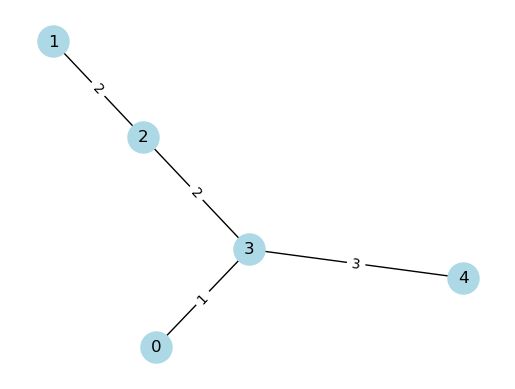

{(1, 2): 2, (2, 3): 2, (3, 4): 3, (0, 3): 1}


In [5]:
pauli_strings = ['IZZXY', 'IXZYY', 'XIIZX']
graph,edge_counts = build_graph(pauli_strings)
print(edge_counts)

### Classical Max-Cut using any groups

In [7]:
import networkx as nx
import random

def classical_max_cut(graph, num_groups, edge_counts,num_iterations=100):
    best_cut_size = -1
    best_cut = None

    for _ in range(num_iterations):
        cut = []
        for node in graph.nodes:
            cut.append(random.randint(0, num_groups - 1))

        cut_size = 0
        for edge in graph.edges:
            if cut[edge[0]] != cut[edge[1]]:
                if (edge[0],edge[1]) in edge_counts:
                    cut_size += edge_counts[(edge[0], edge[1])]
                if (edge[1],edge[0]) in edge_counts:
                    cut_size += edge_counts[(edge[1], edge[0])]
                    




        if cut_size > best_cut_size:
            best_cut_size = cut_size
            best_cut = cut

    return best_cut, best_cut_size

# Example usage


num_groups = 2  # Change the number of groups as desired
cut, cut_size = classical_max_cut(graph, num_groups,edge_counts)

# Print the cut groups and weighted cut size
print("Cut Groups:", cut)
print("Weighted Cut Size:", cut_size)


Cut Groups: [1, 0, 1, 0, 1]
Weighted Cut Size: 8
